In [40]:
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
import pandas as pd
import polars as pl

In [41]:
test = pd.read_csv('../data/test.csv')
test

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,...,63.1265,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,...,47.2211,NaN,NaN,Winter,3.670,Winter,27.0,40.0,Fall,3.0
7,0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,...,50.4767,NaN,NaN,Fall,1.270,NaN,NaN,NaN,Fall,2.0
8,0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0
9,0083e397,Summer,19,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
train = pl.read_csv('../data/train.csv')
train

NameError: name 'pl' is not defined

In [3]:
train.columns

['id',
 'Basic_Demos-Enroll_Season',
 'Basic_Demos-Age',
 'Basic_Demos-Sex',
 'CGAS-Season',
 'CGAS-CGAS_Score',
 'Physical-Season',
 'Physical-BMI',
 'Physical-Height',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'Physical-Diastolic_BP',
 'Physical-HeartRate',
 'Physical-Systolic_BP',
 'Fitness_Endurance-Season',
 'Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec',
 'FGC-Season',
 'FGC-FGC_CU',
 'FGC-FGC_CU_Zone',
 'FGC-FGC_GSND',
 'FGC-FGC_GSND_Zone',
 'FGC-FGC_GSD',
 'FGC-FGC_GSD_Zone',
 'FGC-FGC_PU',
 'FGC-FGC_PU_Zone',
 'FGC-FGC_SRL',
 'FGC-FGC_SRL_Zone',
 'FGC-FGC_SRR',
 'FGC-FGC_SRR_Zone',
 'FGC-FGC_TL',
 'FGC-FGC_TL_Zone',
 'BIA-Season',
 'BIA-BIA_Activity_Level_num',
 'BIA-BIA_BMC',
 'BIA-BIA_BMI',
 'BIA-BIA_BMR',
 'BIA-BIA_DEE',
 'BIA-BIA_ECW',
 'BIA-BIA_FFM',
 'BIA-BIA_FFMI',
 'BIA-BIA_FMI',
 'BIA-BIA_Fat',
 'BIA-BIA_Frame_num',
 'BIA-BIA_ICW',
 'BIA-BIA_LDM',
 'BIA-BIA_LST',
 'BIA-BIA_SMM',
 'BIA-BIA_TBW',
 'PAQ_A-Season',

In [3]:
train = pd.read_csv('../data/train.csv')
matches = train.columns.str.contains('Season')
train['sii'].v

In [6]:
res = train.isnull().sum(axis=1).sort_values().value_counts()

In [7]:
res

7     463
9     202
78    199
12    152
24    138
     ... 
19      5
64      5
60      5
59      5
44      4
Length: 75, dtype: int64

In [10]:
r = res.to_dict()

In [14]:
count = 0
for (a, b) in r.items():
    if a > 75:
        print(a, b)
        count += b

count

78 199
76 97
77 85


381

In [5]:
season_col = train.loc[:, matches]

In [15]:
re = train.isnull().sum(axis=1)

In [16]:
v = [True if re[i] < 75 else False for i in range(len(re))]

In [17]:
v

[True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True

In [18]:
res = train.loc[v,:]

In [19]:
res

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [6]:
season_col

,Basic_Demos-Enroll_Season,CGAS-Season,Physical-Season,Fitness_Endurance-Season,FGC-Season,BIA-Season,PAQ_A-Season,PAQ_C-Season,PCIAT-Season,SDS-Season,PreInt_EduHx-Season
0,Fall,Winter,Fall,NaN,Fall,Fall,NaN,NaN,Fall,NaN,Fall
1,Summer,NaN,Fall,NaN,Fall,Winter,NaN,Fall,Fall,Fall,Summer
2,Summer,Fall,Fall,Fall,Fall,NaN,NaN,Summer,Fall,Fall,Summer
3,Winter,Fall,Summer,Summer,Summer,Summer,NaN,Winter,Summer,Summer,Winter
4,Spring,Summer,NaN,NaN,NaN,NaN,Summer,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3955,Fall,Spring,Fall,NaN,Fall,Fall,NaN,Winter,Winter,Winter,Fall
3956,Winter,NaN,Spring,NaN,Spring,Spring,NaN,Winter,NaN,NaN,Winter
3957,Fall,Spring,Winter,NaN,Winter,Winter,NaN,Winter,Winter,Winter,Fall
3958,Spring,Spring,Winter,NaN,Spring,Summer,NaN,Spring,Spring,Spring,Spring


In [7]:
count = season_col.isnull().sum(axis=0)
# print(col + f": {count/len(train[col])}")

In [8]:
count1 = count /season_col.shape[0]
count, count1

(Basic_Demos-Enroll_Season       0
 CGAS-Season                  1405
 Physical-Season               650
 Fitness_Endurance-Season     2652
 FGC-Season                    614
 BIA-Season                   1815
 PAQ_A-Season                 3485
 PAQ_C-Season                 2239
 PCIAT-Season                 1224
 SDS-Season                   1342
 PreInt_EduHx-Season           420
 dtype: int64,
 Basic_Demos-Enroll_Season    0.000000
 CGAS-Season                  0.354798
 Physical-Season              0.164141
 Fitness_Endurance-Season     0.669697
 FGC-Season                   0.155051
 BIA-Season                   0.458333
 PAQ_A-Season                 0.880051
 PAQ_C-Season                 0.565404
 PCIAT-Season                 0.309091
 SDS-Season                   0.338889
 PreInt_EduHx-Season          0.106061
 dtype: float64)

In [9]:
filter_train = train.loc[:, ~matches]

In [10]:
matches_res = filter_train.columns.str.contains('PCIAT')

In [11]:
filtered = filter_train.loc[:, ~matches_res]

In [12]:
filtered = filtered.drop('id', axis=1)
# filtered = filtered.drop('id', axis=1)

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as pyplot
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer

In [14]:
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(filtered)

In [15]:
np.random.seed(42)
imputed_data = pd.DataFrame(imputed_data, columns=filtered.columns)

In [16]:
df = pd.DataFrame(imputed_data.drop('sii', axis=1))
df['sii'] = imputed_data['sii']

In [17]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(imputed_data.drop('sii', axis=1))
x_scaled

array([[-1.52022575, -0.77084557, -0.61838331, ...,  0.43090457,
        -0.7000463 ,  1.85713198],
       [-0.40109316, -0.77084557,  0.04585029, ...,  0.45206611,
         0.47086139, -1.02929953],
       [-0.12131002,  1.2972767 ,  0.12794657, ..., -0.39439556,
        -0.37762244,  0.89498814],
       ...,
       [ 0.15847313, -0.77084557,  0.01599709, ...,  1.5101432 ,
         1.57389037, -1.02929953],
       [ 0.71803942, -0.77084557,  0.09063008, ..., -0.92343411,
        -0.97156113, -0.0671557 ],
       [ 0.15847313, -0.77084557, -0.20790187, ..., -0.64833407,
        -0.59822824, -0.0671557 ]])

In [18]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x_scaled)

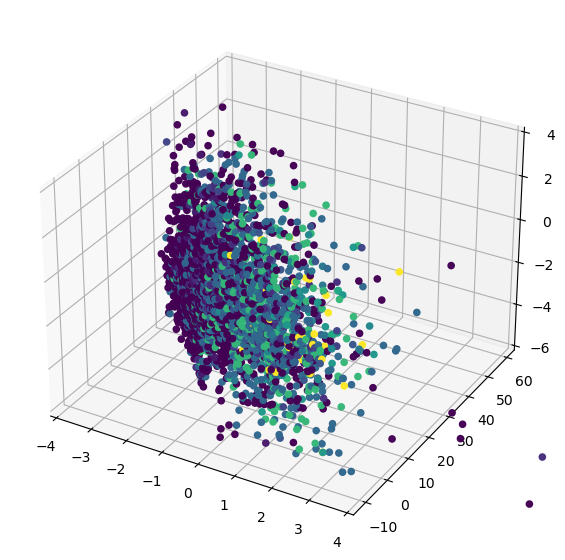

In [19]:
fig = pyplot.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=df['sii'])
ax.set_xlim(-4,4)
ax.set_zlim(-6,4)
pyplot.ion()
pyplot.show()

In [20]:
# imputed_data 是填充后的数据
nullres = train.isnull().sum(axis=1)
nullres


0       19
1       12
2       20
3        7
4       75
        ..
3955     7
3956    54
3957     7
3958    21
3959    74
Length: 3960, dtype: int64

In [21]:
test = pd.read_csv('../data/test.csv')
res = test.isnull().sum(axis=1)
res, test.shape

(0     19
 1     12
 2     20
 3      7
 4     52
 5      7
 6     13
 7     11
 8     51
 9     54
 10    54
 11    45
 12     9
 13    29
 14    52
 15    26
 16    29
 17    36
 18    12
 19    52
 dtype: int64,
 (20, 59))

In [22]:
import pandas as pd

In [23]:
train = pd.read_csv('../data/train.csv')

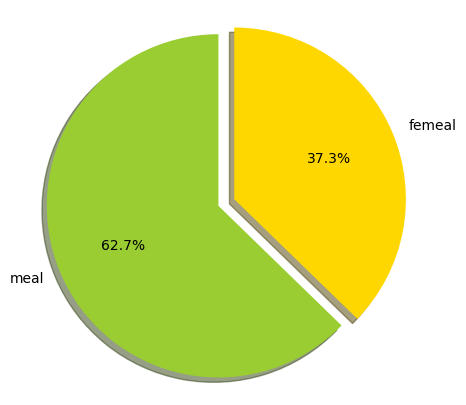

In [24]:
train['Basic_Demos-Sex'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5)) 
labels = 'meal','femeal'  # 定义标签
sizes = train['Basic_Demos-Sex'].value_counts() / len(train['Basic_Demos-Sex'])
colors = ['yellowgreen', 'gold']  # 每一块的颜色
explode = (0, 0.1)  # 突出显示，这里仅仅突出显示第二块（即'Hogs'）

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # 显示为圆（避免比例压缩为椭圆）
plt.show()



In [25]:
a = train['sii'].value_counts()
train['sii'].isnull().sum()
val = [1224, 1594, 730, 378, 34]

In [26]:
train['sii'].isnull().sum()

1224

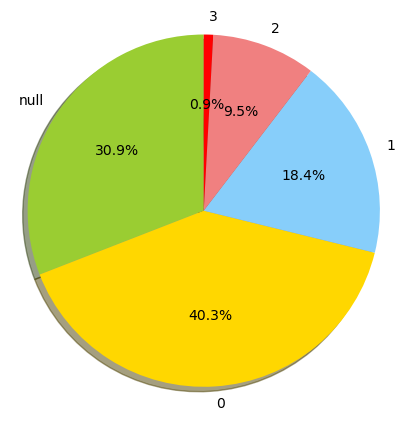

In [27]:
train['sii'].value_counts()
plt.figure(figsize = (5,5)) 
sizes = train['sii'].value_counts() / len(train['sii'])
colors = ['yellowgreen', 'gold','lightskyblue', 'lightcoral','red' ]  # 每一块的颜色
explode = (0, 0, 0,0,0)  # 突出显示，这里仅仅突出显示第二块（即'Hogs'）
labels = ['null', '0', '1', '2', '3']
plt.pie(val, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # 显示为圆（避免比例压缩为椭圆）
plt.show()

In [28]:
train['Basic_Demos-Age'].isnull().sum()

0

In [29]:
train['Basic_Demos-Age'].value_counts().index

Int64Index([8, 9, 7, 10, 6, 11, 12, 13, 14, 15, 16, 17, 5, 18, 21, 19, 20, 22], dtype='int64')

<BarContainer object of 18 artists>

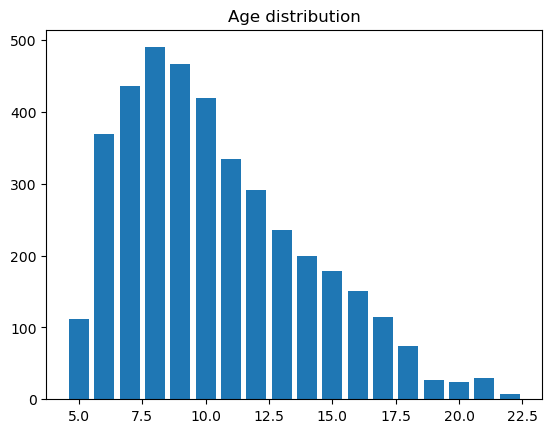

In [30]:
plt.title('Age distribution')
plt.bar(train['Basic_Demos-Age'].value_counts().index, train['Basic_Demos-Age'].value_counts(), ec='r', ls='', lw=2)


In [31]:
train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [32]:
train['Basic_Demos-Enroll_Season'].value_counts()

Spring    1127
Winter     997
Summer     970
Fall       866
Name: Basic_Demos-Enroll_Season, dtype: int64

<BarContainer object of 4 artists>

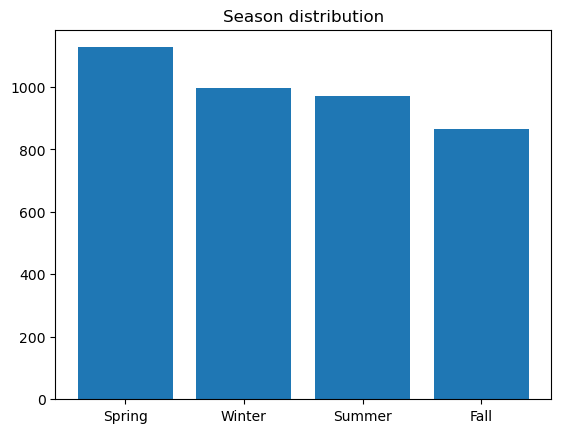

In [33]:
plt.title('Season distribution')
plt.bar(train['Basic_Demos-Enroll_Season'].value_counts().index, train['Basic_Demos-Enroll_Season'].value_counts(), ec='r', ls='', lw=2)

In [34]:
matches = train.columns.str.contains('Season')
season_col = train.loc[:, matches]
count = season_col.isnull().sum(axis=0)
count1 = count/len(train['Basic_Demos-Enroll_Season'])
count1

Basic_Demos-Enroll_Season    0.000000
CGAS-Season                  0.354798
Physical-Season              0.164141
Fitness_Endurance-Season     0.669697
FGC-Season                   0.155051
BIA-Season                   0.458333
PAQ_A-Season                 0.880051
PAQ_C-Season                 0.565404
PCIAT-Season                 0.309091
SDS-Season                   0.338889
PreInt_EduHx-Season          0.106061
dtype: float64

In [35]:
train_season = train.groupby('Basic_Demos-Enroll_Season')
val = []
null_count = []
count_0 = []
count_1 = []
count_2 = []
count_3 = []
# 每个属性不同季节的数量
for group in train_season:
    count_0.append(group[1]['sii'].isnull().sum())
    val.append(group[1]['sii'].value_counts())
    count_0.append(group[1]['sii'].value_counts()[0])
    count_0.append(group[1]['sii'].value_counts()[1])
    count_0.append(group[1]['sii'].value_counts()[2])
    count_0.append(group[1]['sii'].value_counts()[3])
set1 = count_0[0:5]
set2 = count_0[5:10]
set3 = count_0[10:15]
set4 = count_0[15:20]
set1, set2, set3, set4

([190, 400, 166, 98, 12],
 [393, 442, 201, 84, 7],
 [320, 377, 172, 93, 8],
 [321, 375, 191, 103, 7])

In [36]:
import numpy as np
sii = ['null', '0', '1', '2', '3']
x = np.arange(5)
print(x)
width = 0.2
#[0 1 2 3 4]

spring = x
summer = x + width
fall= x + 2 * width
winter = x + 3 * width
winter2 = x + 4 * width


[0 1 2 3 4]


([<matplotlib.axis.XTick at 0x185b69f7ad0>,
 [Text(0.2, 0, 'null'),
  Text(1.2, 0, '0'),
  Text(2.2, 0, '1'),
  Text(3.2, 0, '2'),
  Text(4.2, 0, '3')])

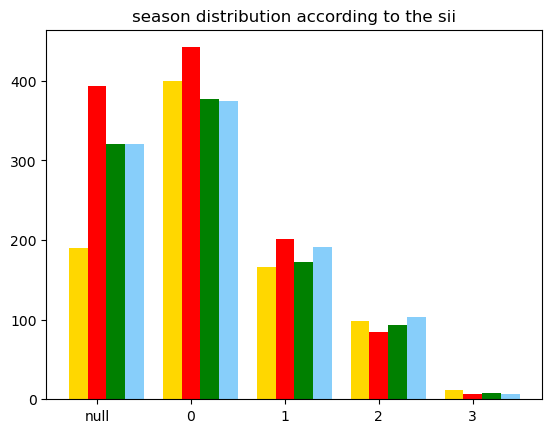

In [37]:
plt.title('season distribution according to the sii')
plt.bar(spring, set1,width=width,color="gold")
plt.bar(summer, set2,width=width,color="red")
plt.bar(fall, set3,width=width,color="green")
plt.bar(winter, set4,width=width,color="lightskyblue")
plt.xticks(x+width, labels=sii)

In [38]:
res = train.isnull().sum(axis=0).sort_values(ascending=False)


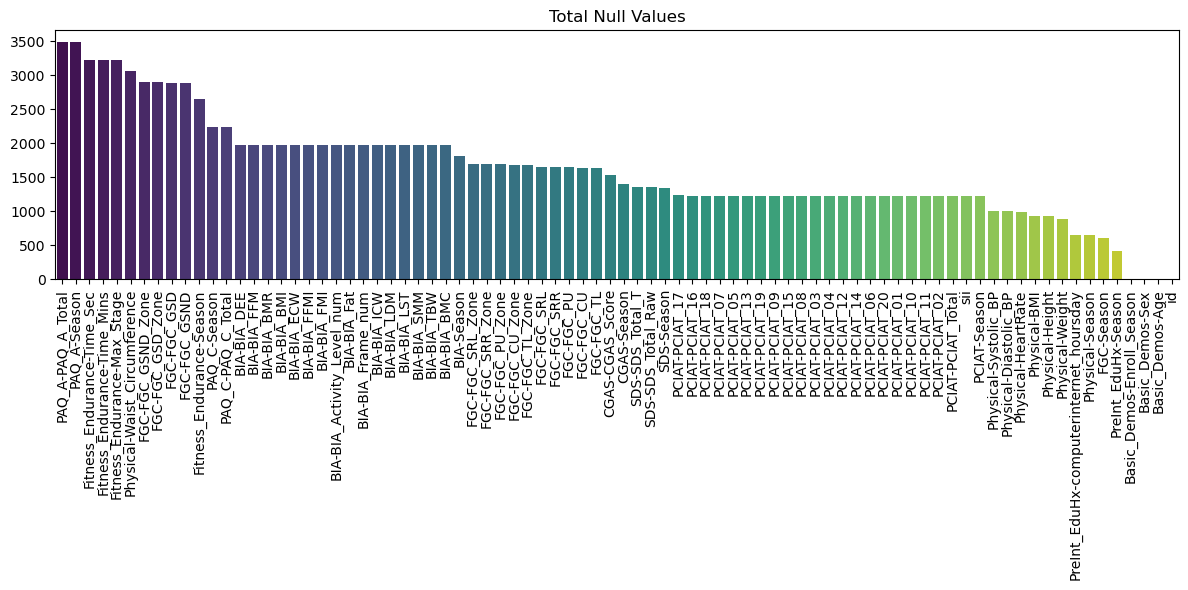

In [39]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x=res.index, y=res, palette='viridis')
plt.xticks(rotation=90)
plt.title('Total Null Values')
plt.tight_layout()
plt.show()

In [40]:
temp = train['sii'].isnull()
data = train.loc[~temp,:]
res = data.isnull().sum(axis=0).sort_values(ascending=False)

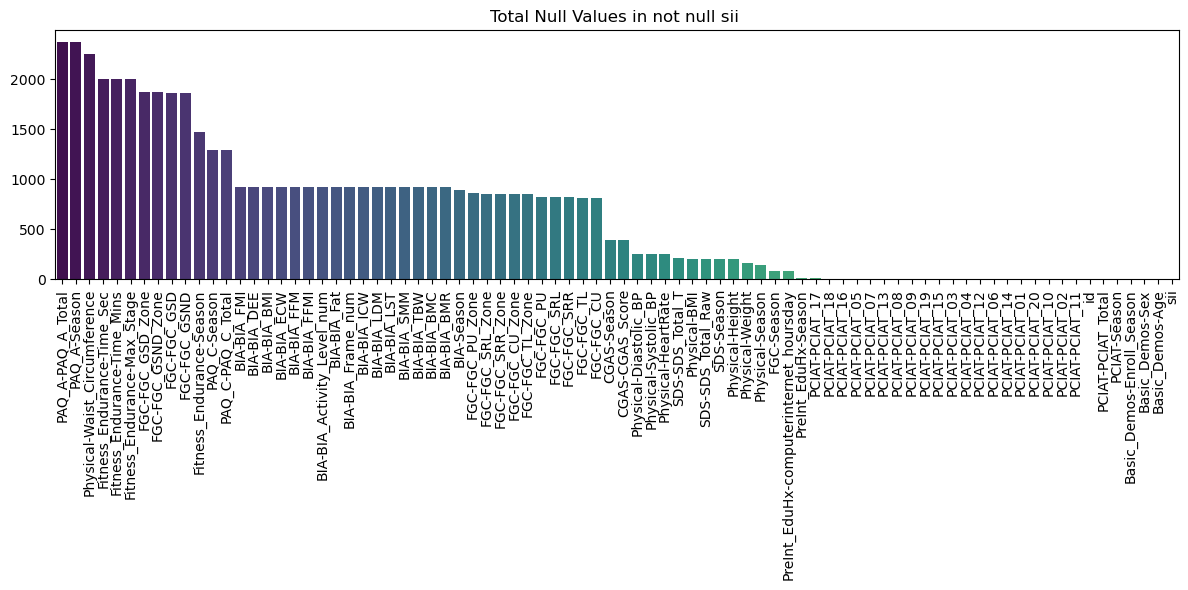

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x=res.index, y=res, palette='viridis')
plt.xticks(rotation=90)
plt.title('Total Null Values in not null sii ')
plt.tight_layout()
plt.show()

In [49]:
train.loc[:,~matches].columns

Index(['id', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score',
       'Physical-BMI', 'Physical-Height', 'Physical-Weight',
       'Physical-Waist_Circumference', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins',
       'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone',
       'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone',
       'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone',
       'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total',
       'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'P

In [ ]:
def feature_engineering(df):
    # 为不同属性建立关联，
    '''
    height和age有关，waist与age有关
    BIA_BIA_BMI
    BIA_BIA_BMR 基础代谢率
    BIA_BIA_DEE 日常能量消耗
    BIA_BIA_ECW 细胞外水？
    BIA_BIA_FFM 无脂肪质量
    BIA_BIA_FFMI 无脂质量指数
    BIA_BIA_FMI 脂肪质量指数
    BIA_BIA_Fat 体脂百分比
    BIA_BIA_Frame_num 
    BIA_BIA_ICW 细胞内水
    BIA_BIA_LDM 瘦干质量
    BIA_BIA_LST 瘦软组织
    BIA_BIA_SMM 骨骼肌肉质量
    BIA_BIA_TBW 身体水分含量
    BIA-BIA_Activity_Level_num 活动水平
    DEE 和 Activity_Level_num 有关
   BIA_BIA_BMR 和 BIA_BIA_Fat 有关
   BIA_BIA_FMI 和 BIA_BIA_DEE 有关
    '''
    df['Internet_Hours_Age'] = df['PreInt_EduHx-computerinternet_hoursday'] * df['Basic_Demos-Age']
    df['Height-Age'] = df['Basic_Demos-Age'] * df['Physical-Height']
    df['BMI-Age'] = df['Physical-BMI'] * df['Basic_Demos-Age']
    # 体脂越高，基础代谢率可能越低
    df['BMR-Fat'] = df['BIA-BIA_Fat'] / df['BIA-BIA_BMR']
    # DEE 日常能量消耗和重量，FMI有关
    df['DEE_Weight'] = df['BIA-BIA_DEE'] / df['Physical-Weight']
    df['DEE_FMI'] = df['BIA-BIA_DEE'] / df['BIA-BIA_FMI']
    # 身体水分含量和细胞内水有关，和肌肉，成正比
    df['ICW_TBW'] = df['BIA-BIA_ICW'] * df['BIA-BIA_TBW']
    df['SMM_TBW'] = df['BIA-BIA_SMM'] * df['BIA-BIA_TBW']
    '''
    FGC-FGC_GSD 总计握力
    FGC-FGC_PU 总计push up
    FGC-FGC_CU
    '''
    df['GSD-Age']= df['FGC-FGC_GSND'] * df['FGC-FGC_GSD'] * df['Basic_Demos-Age']
    '''
    PreInt_EduHx-computerinternet_hoursday 电脑使用时间
    可能和年龄质量有关
    '''
    df['Time-Age'] = df['Basic_Demos-Age'] * df['PreInt_EduHx-computerinternet_hoursday']
    df['FMI-Time'] = df['BIA-BIA_FMI'] * df['PreInt_EduHx-computerinternet_hoursday']
    ''' 
    FGC-FGC_SRL_Zone              1693
    FGC-FGC_SRR_Zone              1691
    FGC-FGC_PU_Zone               1689
    FGC-FGC_CU_Zone               1678
    FGC-FGC_TL_Zone               1675
    FGC-FGC_SRL                   1655
    FGC-FGC_SRR                   1653
    FGC-FGC_PU                    1650
    FGC-FGC_CU                    1638
    FGC-FGC_TL                    1636
    '''
    return df


In [52]:
train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [39]:
test

NameError: name 'test' is not defined

In [54]:
train.isnull().sum(axis=1).sort_values(ascending=False)

1172    78
1487    78
2130    78
3019    78
2137    78
        ..
2121     3
2941     3
2920     3
434      3
2411     3
Length: 3960, dtype: int64

In [55]:
test = pd.read_csv('../data/test.csv')

In [57]:
test.isnull().sum(axis=1).sort_values(ascending=False)

10    54
9     54
4     52
14    52
19    52
8     51
11    45
17    36
13    29
16    29
15    26
2     20
0     19
6     13
1     12
18    12
7     11
12     9
5      7
3      7
dtype: int64

In [22]:
res = train.isnull().sum(axis=0).sort_values(ascending=False)

In [33]:
res[:20]

PAQ_A-PAQ_A_Total               3485
PAQ_A-Season                    3485
Fitness_Endurance-Time_Sec      3220
Fitness_Endurance-Time_Mins     3220
Fitness_Endurance-Max_Stage     3217
Physical-Waist_Circumference    3062
FGC-FGC_GSND_Zone               2898
FGC-FGC_GSD_Zone                2897
FGC-FGC_GSD                     2886
FGC-FGC_GSND                    2886
Fitness_Endurance-Season        2652
PAQ_C-Season                    2239
PAQ_C-PAQ_C_Total               2239
BIA-BIA_DEE                     1969
BIA-BIA_FFM                     1969
BIA-BIA_BMR                     1969
BIA-BIA_BMI                     1969
BIA-BIA_ECW                     1969
BIA-BIA_FFMI                    1969
BIA-BIA_FMI                     1969
dtype: int64

In [34]:
res[20:40]

BIA-BIA_Activity_Level_num    1969
BIA-BIA_Fat                   1969
BIA-BIA_Frame_num             1969
BIA-BIA_ICW                   1969
BIA-BIA_LDM                   1969
BIA-BIA_LST                   1969
BIA-BIA_SMM                   1969
BIA-BIA_TBW                   1969
BIA-BIA_BMC                   1969
BIA-Season                    1815
FGC-FGC_SRL_Zone              1693
FGC-FGC_SRR_Zone              1691
FGC-FGC_PU_Zone               1689
FGC-FGC_CU_Zone               1678
FGC-FGC_TL_Zone               1675
FGC-FGC_SRL                   1655
FGC-FGC_SRR                   1653
FGC-FGC_PU                    1650
FGC-FGC_CU                    1638
FGC-FGC_TL                    1636
dtype: int64

In [35]:
res[40:60]

CGAS-CGAS_Score      1539
CGAS-Season          1405
SDS-SDS_Total_T      1354
SDS-SDS_Total_Raw    1351
SDS-Season           1342
PCIAT-PCIAT_17       1235
PCIAT-PCIAT_16       1232
PCIAT-PCIAT_18       1232
PCIAT-PCIAT_07       1231
PCIAT-PCIAT_05       1231
PCIAT-PCIAT_13       1231
PCIAT-PCIAT_19       1230
PCIAT-PCIAT_09       1230
PCIAT-PCIAT_15       1230
PCIAT-PCIAT_08       1230
PCIAT-PCIAT_03       1229
PCIAT-PCIAT_04       1229
PCIAT-PCIAT_12       1229
PCIAT-PCIAT_14       1228
PCIAT-PCIAT_06       1228
dtype: int64

In [36]:
res[60:]

PCIAT-PCIAT_20                            1227
PCIAT-PCIAT_01                            1227
PCIAT-PCIAT_10                            1227
PCIAT-PCIAT_11                            1226
PCIAT-PCIAT_02                            1226
PCIAT-PCIAT_Total                         1224
sii                                       1224
PCIAT-Season                              1224
Physical-Systolic_BP                      1006
Physical-Diastolic_BP                     1006
Physical-HeartRate                         993
Physical-BMI                               938
Physical-Height                            933
Physical-Weight                            884
PreInt_EduHx-computerinternet_hoursday     659
Physical-Season                            650
FGC-Season                                 614
PreInt_EduHx-Season                        420
Basic_Demos-Enroll_Season                    0
Basic_Demos-Sex                              0
Basic_Demos-Age                              0
id           

In [38]:
train.isna()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,False
1,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3956,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,False,True
3957,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
